# Using GraphiPy to extract data from Twitter

In [1]:
from graphipy.graphipy import GraphiPy

In [2]:
# create GraphiPy object (default to Pandas)
graphipy = GraphiPy()

# Creating the Twitter Object
GraphiPy's Twitter object needs CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, and TOKEN_SECRET in order to connect to Twitter's Standard Search API:

To get CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, and TOKEN_SECRET, login to Twitter and go to https://developer.twitter.com/en/apps/ and click the "create an app" button at the upper right corner of the page.

In [3]:
# The twitter API needs these credentials
CONSUMER_KEY = ""
CONSUMER_SECRET = ""
ACCESS_TOKEN = ""
TOKEN_SECRET = ""
twitter_api_credentials = {
    "consumer_key": CONSUMER_KEY,
    "consumer_secret": CONSUMER_SECRET,
    "access_token": ACCESS_TOKEN,
    "token_secret": TOKEN_SECRET
}
# create the twitter object
twitter = graphipy.get_twitter(twitter_api_credentials)

# Search tweets by keyword
### def fetch_tweets_by_topic(graph, keyword, limit=15)

Types of node returned:
- tweet
    - tweets returned by searching for keyword 
    - original tweet if any tweet returned retweets/quotes another tweet

- user - the creator of each tweet

Types of edges returned:
- CREATED_BY
- CREATED
- RETWEETED_BY (if exists)
- RETWEET (if exists)
- QUOTED_BY (if exists)
- QUOTE (if exists)

In [4]:
keyword = "python"
limit = 5

# Every function call modifies the graph that is sent as input
# tweets_graph = graphipy.create_graph()
# twitter.fetch_tweets_by_topic(tweets_graph, keyword, 5)

# However, it also returns the graph modified so you can assign it to other variables like so:
tweets_graph = twitter.fetch_tweets_by_topic(graphipy.create_graph(), keyword, 5)

In [5]:
# To get the list of available nodes
print(tweets_graph.get_nodes().keys())

dict_keys(['tweet', 'user'])


In [6]:
# You can get the dataframe from Pandas by specifying the node, for example: tweet
tweets_df = tweets_graph.get_df("tweet")

In [7]:
tweets_df.head()

,_id,Label,label_attribute,created_at,text,source,truncated,is_quote_status,retweet_count,favorite_count,lang,hashtags,urls,media,user_mentions
0,1063247796612911104,tweet_1063247796612911104,tweet,Fri Nov 16 01:50:03 +0000 2018,RT @PythonHub: Python - how to 'stream' data f...,"<a href=""http://www.simbasystems.com"" rel=""nof...",False,False,1,0,en,[],[https://t.co/n6Z0gTpuy4],{},[PythonHub]
1,1063210426643689472,tweet_1063210426643689472,tweet,Thu Nov 15 23:21:33 +0000 2018,Python - how to 'stream' data from my MongoDB ...,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",False,False,1,0,en,[],[https://t.co/n6Z0gTpuy4],{},[]
2,1063247750861512704,tweet_1063247750861512704,tweet,Fri Nov 16 01:49:52 +0000 2018,RT @miyahancom: RHEL8.0\n・Python 3.6\n・nginx 1...,"<a href=""http://twitter.com/download/iphone"" r...",False,False,164,0,ja,[],[],{},[miyahancom]
3,1063088475656736774,tweet_1063088475656736774,tweet,Thu Nov 15 15:16:58 +0000 2018,RHEL8.0\n・Python 3.6\n・nginx 1.14\n・MySQL 8.0\...,"<a href=""https://about.twitter.com/products/tw...",True,False,164,223,ja,[],[https://t.co/D8RGsPHcfg],{},[]
4,1063247717386936320,tweet_1063247717386936320,tweet,Fri Nov 16 01:49:44 +0000 2018,RT @ipfconline1: A Complete Guide on Getting S...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,False,32,0,en,[DeepLearning],[https://t.co/VePc6c1juw],{},[ipfconline1]


In [8]:
# show the attributes of this node
tweets_df.iloc[0]

_id                                              1063247796612911104
Label                                      tweet_1063247796612911104
label_attribute                                                tweet
created_at                            Fri Nov 16 01:50:03 +0000 2018
text               RT @PythonHub: Python - how to 'stream' data f...
source             <a href="http://www.simbasystems.com" rel="nof...
truncated                                                      False
is_quote_status                                                False
retweet_count                                                      1
favorite_count                                                     0
lang                                                              en
hashtags                                                          []
urls                                       [https://t.co/n6Z0gTpuy4]
media                                                             {}
user_mentions                     

In [9]:
# To get the list of available edges
print(tweets_graph.get_edges().keys())

dict_keys(['created_by', 'created', 'retweet', 'retweeted by'])


In [10]:
# You can also get the dataframe from Pandas by specifying the edge, for example: created_by
tweets_created_by_edge_df = tweets_graph.get_df("created_by", "edge")

In [11]:
tweets_created_by_edge_df.head()

,Source,Target,Label,label_attribute,_id
0,1063247796612911104,2704548373,CREATED_BY,CREATED_BY,10632477966129111042704548373CREATED_BY
1,1063247750861512704,1491805640,CREATED_BY,CREATED_BY,10632477508615127041491805640CREATED_BY
2,1063247717386936320,185622716,CREATED_BY,CREATED_BY,1063247717386936320185622716CREATED_BY
3,1063247716803735555,10552072,CREATED_BY,CREATED_BY,106324771680373555510552072CREATED_BY
4,1063247642438848512,495066576,CREATED_BY,CREATED_BY,1063247642438848512495066576CREATED_BY


In [12]:
# You can get the dataframe from Pandas for creators of each tweet at the same time
tweets_creators_df = tweets_graph.get_df("user")
tweets_creators_df.head()

,name,_id,Label,label_attribute,screen_name,location,url,description,protected,verified,...,favourites_count,statuses_count,created_at,geo_enabled,lang,profile_background_color,profile_background_image_url,profile_image_url,profile_link_color,profile_text_color
0,NoSQL,2704548373,NoSQL,user,NoSQLDigest,,None,NoSQL Digest of tweets.,False,False,...,84,1066659,Sun Aug 03 17:07:24 +0000 2014,False,en,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/4992571800...,1DA1F2,333333
1,ポムポムプリン【ひかるん】,1491805640,ポムポムプリン【ひかるん】,user,p_azrz,パソピアード東京1F音楽ゲームコーナー,None,ひかまるとえみこのだららん生活。ポムポムプリンアンバサダー。トランペッター。エンジニア。音ゲ...,False,False,...,91178,85774,Sat Jun 08 02:34:03 +0000 2013,True,ja,0099B9,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1062935744...,FAB81E,333333
2,Dean T.Carson II CPA,185622716,Dean T.Carson II CPA,user,DCarsonCPA,"NYC, NY, National and Global",https://t.co/PeL9nnfpTd,Certified Public Accountant; 24+ yrs. Wall St....,False,False,...,553,230453,Wed Sep 01 12:51:33 +0000 2010,False,en,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7476304234...,1DA1F2,333333
3,Kozo Nishida,10552072,Kozo Nishida,user,kozo2,"Osaka, Japan",https://t.co/VyQTxckjqt,bioinformaticsデスマ中,False,False,...,15213,43849,Sun Nov 25 10:10:43 +0000 2007,False,en,000000,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/3445132615...,000000,000000
4,Judyth Mermelstein,495066576,Judyth Mermelstein,user,GadflyQuebec,"Verdun, QC, Canada",https://t.co/BvtEjbzPMK,"freelance writer, editor, translator (francais...",False,False,...,27062,173377,Fri Feb 17 15:21:11 +0000 2012,False,en,352726,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/2281304775...,D02B55,000000


In [13]:
# You can display screen name of creators
tweets_creators_df.screen_name

0     NoSQLDigest
1          p_azrz
2      DCarsonCPA
3           kozo2
4    GadflyQuebec
Name: screen_name, dtype: object

# Get one user's followers by screen name
### def fecth_followers_by_screenname(graph, screenname, limit=15)

Types of node returned:

- user
    - user returned by searching for screen name
    - followers of returned user

Types of edge returned:

- FOLLOWED_BY
- FOLLOW

In [14]:
# You can get followers of a single user in previous result by its screen name
screenname = tweets_creators_df.screen_name[0]
followers_limit = 10

# Call the appropriate function
followers_graph = twitter.fecth_followers_by_screenname(graphipy.create_graph(), screenname, followers_limit)

In [15]:
# Get all the node dataframes available from the query
followers_graph_nodes = followers_graph.get_nodes()

# Find out list of available nodes
print(followers_graph_nodes.keys())

dict_keys(['user'])


In [16]:
followers_graph_nodes["user"].head()

,name,_id,Label,label_attribute,screen_name,location,url,description,protected,verified,...,favourites_count,statuses_count,created_at,geo_enabled,lang,profile_background_color,profile_background_image_url,profile_image_url,profile_link_color,profile_text_color
0,NoSQL,2704548373,NoSQL,user,NoSQLDigest,,None,NoSQL Digest of tweets.,False,False,...,84,1066659,Sun Aug 03 17:07:24 +0000 2014,False,en,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/4992571800...,1DA1F2,333333
1,Khalid Almuraee,2929025108,Khalid Almuraee,user,KAlmuraee,🌍 ~ 🌐,None,"D3veloper 💻 & [DIY]3r 🔧 , Computer Engineer, I...",False,False,...,103,207,Sat Dec 13 22:52:19 +0000 2014,False,en,000000,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9573576074...,7E919E,333333
2,Daniel Langhjelm,1056427291918520320,Daniel Langhjelm,user,DLanghjelm,"Vanouver, British Columbia",None,"#Security #Professional at Corporate Office, W...",False,False,...,7,52,Sun Oct 28 06:07:48 +0000 2018,False,en,000000,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1056998401...,1B95E0,000000
3,Fredrik Knutsen,938821771641475072,Fredrik Knutsen,user,MysOstLover,Here,None,Coolest guy on the block.,False,False,...,550,143,Thu Dec 07 17:25:27 +0000 2017,False,en,F5F8FA,None,http://pbs.twimg.com/profile_images/1016253281...,1DA1F2,333333
4,Loïc,3333377014,Loïc,user,Loic__Lefevre,,None,,False,False,...,827,760,Thu Jun 18 20:09:35 +0000 2015,False,fr,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,http://abs.twimg.com/sticky/default_profile_im...,1DA1F2,333333


In [17]:
# The same works with edges
followers_graph_edges = followers_graph.get_edges()
print(followers_graph_edges.keys())

dict_keys(['follow', 'followed by'])


In [18]:
followers_graph_edges["followed by"].head()

,Source,Target,Label,label_attribute,_id
0,2704548373,2929025108,FOLLOWED BY,FOLLOWED BY,27045483732929025108FOLLOWED BY
1,2704548373,1056427291918520320,FOLLOWED BY,FOLLOWED BY,27045483731056427291918520320FOLLOWED BY
2,2704548373,938821771641475072,FOLLOWED BY,FOLLOWED BY,2704548373938821771641475072FOLLOWED BY
3,2704548373,3333377014,FOLLOWED BY,FOLLOWED BY,27045483733333377014FOLLOWED BY
4,2704548373,707605541019734017,FOLLOWED BY,FOLLOWED BY,2704548373707605541019734017FOLLOWED BY


In [19]:
followers_graph_edges["follow"].head()

,Source,Target,Label,label_attribute,_id
0,2929025108,2704548373,FOLLOW,FOLLOW,29290251082704548373FOLLOW
1,1056427291918520320,2704548373,FOLLOW,FOLLOW,10564272919185203202704548373FOLLOW
2,938821771641475072,2704548373,FOLLOW,FOLLOW,9388217716414750722704548373FOLLOW
3,3333377014,2704548373,FOLLOW,FOLLOW,33333770142704548373FOLLOW
4,707605541019734017,2704548373,FOLLOW,FOLLOW,7076055410197340172704548373FOLLOW


# Get one user's friends by screen name
### def fecth_friends_by_screenname(graph, screenname, limit=15)

Types of node returned:

- user
    - user returned by searching for screen name
    - friends of returned user

Types of edge returned:

- FRIEND_WITH

In [20]:
# You can use the screenname above to search for its friends
friends_limit = 3
friends_graph = twitter.fecth_friends_by_screenname(graphipy.create_graph(), screenname, friends_limit)

# Get single user's information by screen name
### def fetch_user_by_screenname(graph, screenname)

Types of node returned:

- user - user returned by searching for screen name

No edge returned

In [21]:
# You can also use the screenname above to simply retrieve single user information
single_user_graph = twitter.fetch_user_by_screenname(graphipy.create_graph(), screenname)

# Get single tweet's information by tweet id
### def fetch_user_by_screenname(graph, screenname)

Types of node returned:

- tweet - tweet returned by searching for tweet id

No edge returned

In [22]:
# You can also use a tweet id above to simply retrieve single tweet information
id = tweets_df._id[0]
single_tweet_graph = twitter.fetch_tweet_by_id(graphipy.create_graph(), id)

# Export Graph as CSV files
#### For more information, see DataExportDemo.ipynb

In [23]:
# You can call export_all_csv() on the graph desired
# then graph can be showed via gephi, cytoscape, etc. takes CSV files
csv_name = "tweets_searched_by_python"
export_path_all = tweets_graph.export_all_csv(csv_name)

# You cam also specify we want to export by calling export_CSV()
csv_name = "tweets_searched_by_python_specific"
nodes = {"user"}
edges = {"created by", "create"}
export_path_specific = tweets_graph.export_csv(csv_name, nodes, edges)

# Visualization with NetworkX
#### For more information, see DataExportDemo.ipynb

In [24]:
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt

In [25]:
# Create the networkx exporter object
exporter = graphipy.get_nx_exporter()
nx_graph = exporter.create_from_pd(followers_graph)

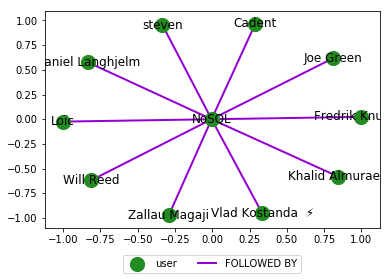

In [26]:
# Draw the graph using graphipy
color_set = set(mcolors.CSS4_COLORS)
options = {
    "node_label": "Label",
    "colorful_edges": True,
    "color_set": color_set
}
legend = exporter.draw_random(nx_graph, options=options, legend=plt)